In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import os
# save_path = "C:\Users\User\Documents"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# 讀取資料並顯示資訊
train_data = pd.read_csv('/content/drive/My Drive/titanic/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/titanic/test.csv')
print(train_data.info())
print(test_data.info())

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 no

In [3]:
# 新增 'Survived' 欄位到測試資料，並初始化為 NaN，以便兩個資料集的欄位對齊
test_data['Survived'] = float('nan')

# 使用 pd.concat 合併 train_data 和 test_data
total_data = pd.concat([train_data, test_data], ignore_index=True)

# 顯示合併後的資料集資訊
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [4]:
# 顯示 PassengerId 欄位的前 15 筆資料
train_data['PassengerId'].head(15)

,PassengerId
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


Unique values in 'Survived' column: [ 0.  1. nan]


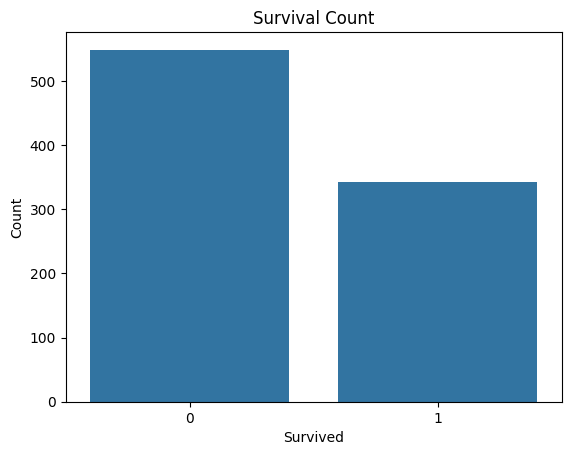

In [5]:
# 檢查 total_data 中 'Survived' 欄位的唯一值
print("Unique values in 'Survived' column:", total_data['Survived'].unique())

# 使用 countplot 查看 train_data 中生還和未生還的資料分佈
sns.countplot(data=train_data, x='Survived')
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

Unique values in 'Pclass' column: [3 1 2]


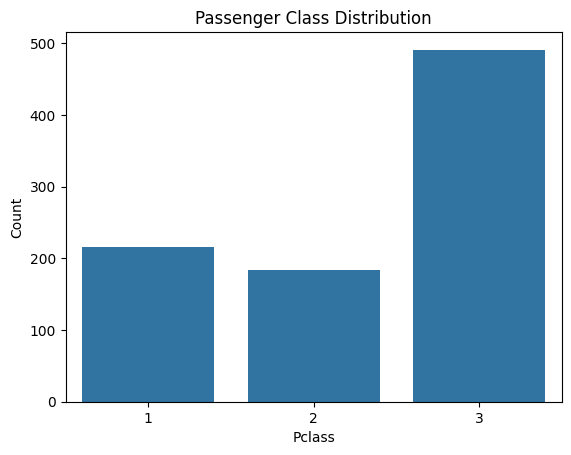

In [6]:
# 檢查 Pclass 欄位的唯一值
print("Unique values in 'Pclass' column:", total_data['Pclass'].unique())

# 使用 countplot 查看 Pclass 欄位的分佈
sns.countplot(data=train_data, x='Pclass')
plt.title("Passenger Class Distribution")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.show()

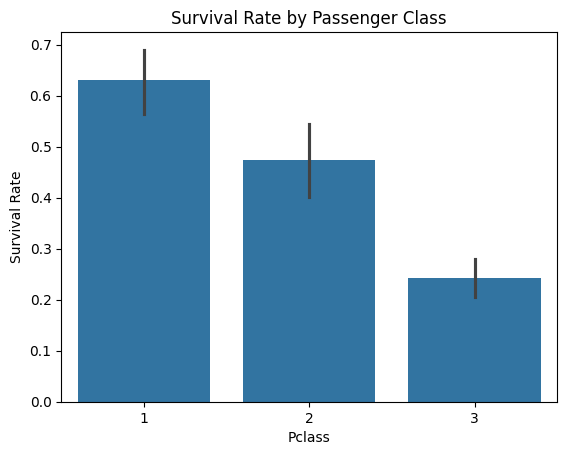

In [7]:
# 使用 barplot 查看不同 Pclass 的生還率
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Survival Rate")
plt.show()

Unique values in 'Sex' column: ['male' 'female']


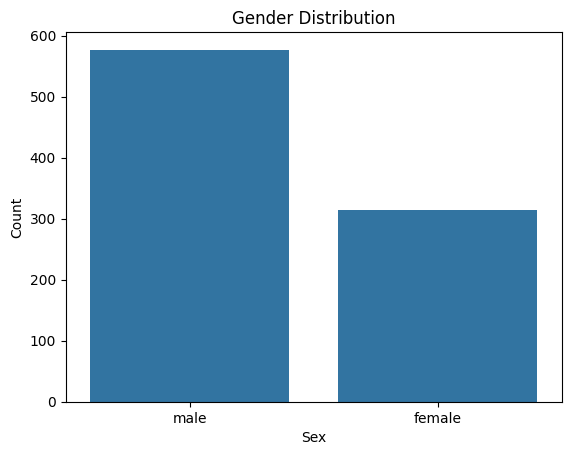

In [8]:
# 檢查 'Sex' 欄位的唯一值
print("Unique values in 'Sex' column:", total_data['Sex'].unique())
# 使用 countplot 查看 Sex 欄位的分佈
sns.countplot(data=train_data, x='Sex')
plt.title("Gender Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

# 使用 LabelEncoder 將 'Sex' 欄位轉換為數值
labelencoder = LabelEncoder()
total_data['Sex'] = labelencoder.fit_transform(total_data['Sex'])

# 檢查轉換後的唯一值
print("Encoded values in 'Sex' column:", total_data['Sex'].unique())


Encoded values in 'Sex' column: [1 0]


In [10]:
# 檢查 total_data 資料集的資訊，包括 Age 欄位的缺失值情況
total_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB


[(20.125, 24.0], (32.312, 38.0], (24.0, 28.0], NaN, (47.0, 80.0], (0.419, 16.0], (16.0, 20.125], (38.0, 47.0], (28.0, 32.312]]
Categories (8, interval[float64, right]): [(0.419, 16.0] < (16.0, 20.125] < (20.125, 24.0] <
                                           (24.0, 28.0] < (28.0, 32.312] < (32.312, 38.0] <
                                           (38.0, 47.0] < (47.0, 80.0]]


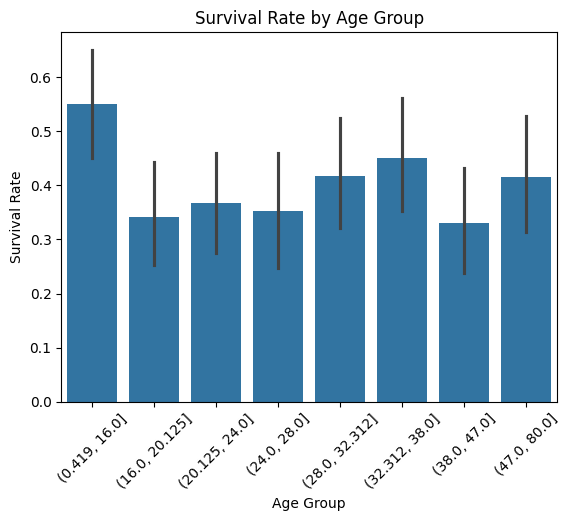

In [11]:


# 將 Age 欄位分組為 8 等分，並將結果儲存在新的欄位 Age_qcut
train_data['Age_qcut'] = pd.qcut(train_data['Age'], 8)

# 查看 Age_qcut 欄位和其分組的唯一值
print(train_data['Age_qcut'].unique())

# 使用 barplot 查看不同年齡段的生存率
sns.barplot(x='Age_qcut', y='Survived', data=train_data)
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.xticks(rotation=45)  # 旋轉 x 軸標籤，方便閱讀
plt.show()



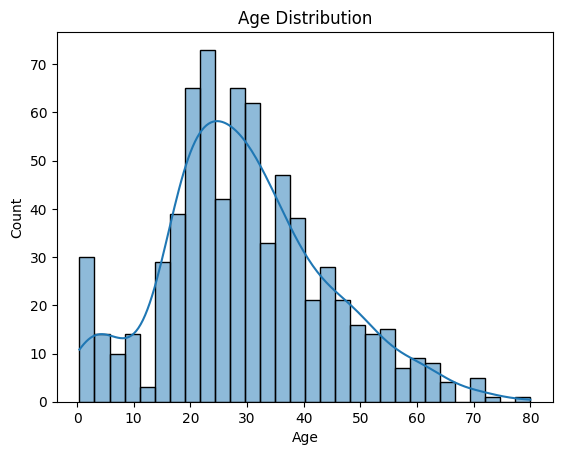

In [12]:
# 使用 histplot 查看 Age 欄位的分佈情形
sns.histplot(train_data['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [13]:
# 先將缺失的 Age 值設為 2
total_data['Age'] = total_data['Age'].fillna(2)

# 將 Age <= 16 的資料設為 1，其餘設為 2
total_data.loc[total_data['Age'] <= 16, 'Age'] = 1
total_data.loc[total_data['Age'] > 16, 'Age'] = 2

# 檢查 Age 欄位的唯一值
print("Unique values in 'Age' column after transformation:", total_data['Age'].unique())


Unique values in 'Age' column after transformation: [2. 1.]


In [14]:
print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB
None


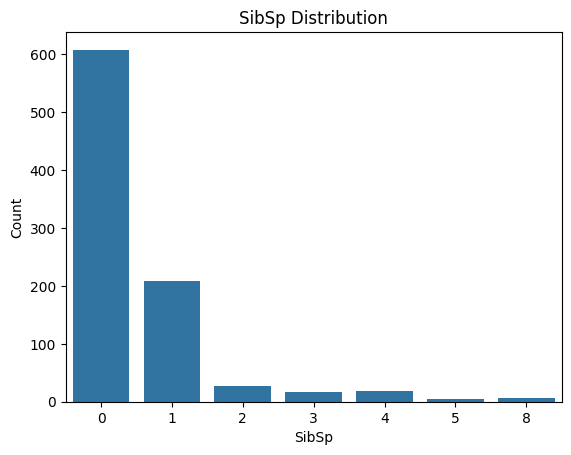

In [15]:
# 使用 countplot 查看 SibSp 欄位的分佈
sns.countplot(data=train_data, x='SibSp')
plt.title("SibSp Distribution")
plt.xlabel("SibSp")
plt.ylabel("Count")
plt.show()

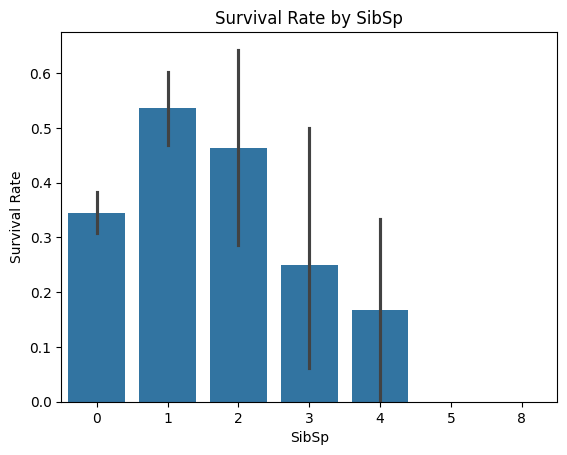

In [16]:
# 使用 barplot 查看不同 SibSp 值的生存率
sns.barplot(x='SibSp', y='Survived', data=train_data)
plt.title("Survival Rate by SibSp")
plt.xlabel("SibSp")
plt.ylabel("Survival Rate")
plt.show()

In [17]:
# 將 SibSp 等於 1 或 2 的值設為 1
total_data.loc[(total_data['SibSp'] == 1) | (total_data['SibSp'] == 2), 'SibSp'] = 1

# 將 SibSp 大於 2 的值設為 2
total_data.loc[total_data['SibSp'] > 2, 'SibSp'] = 2

# 將 SibSp 等於 0 的值設為 0
total_data.loc[total_data['SibSp'] == 0, 'SibSp'] = 0

# 查看轉換後 SibSp 欄位的值計數
print(total_data['SibSp'].value_counts())


SibSp
0    891
1    361
2     57
Name: count, dtype: int64


In [18]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB


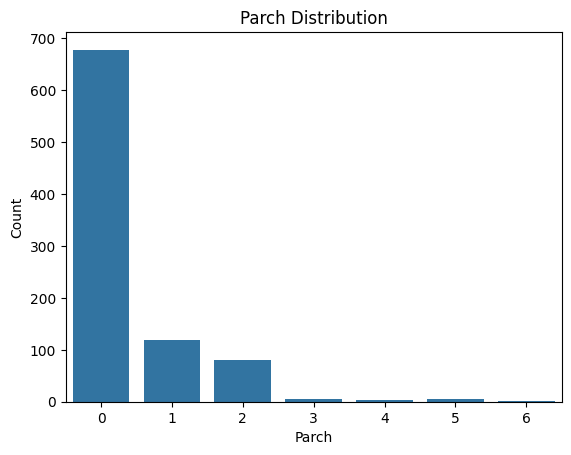

In [19]:
# 使用 countplot 查看 Parch 欄位的分佈
sns.countplot(data=train_data, x='Parch')
plt.title("Parch Distribution")
plt.xlabel("Parch")
plt.ylabel("Count")
plt.show()

In [20]:
total_data['Parch'].value_counts()

,count
Parch,
0,1002
1,170
2,113
3,8
5,6
4,6
6,2
9,2


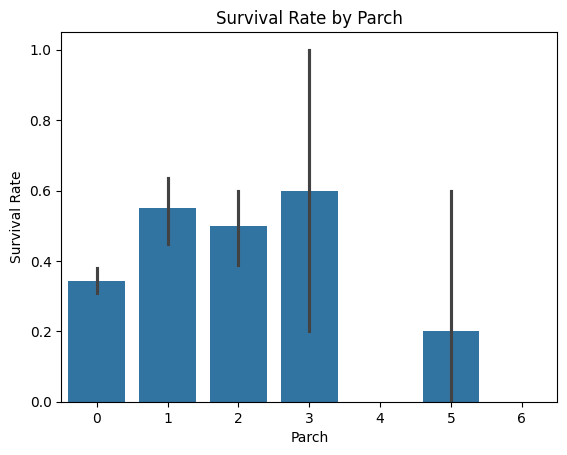

In [21]:
# 使用 barplot 查看不同 Parch 值的生存率
sns.barplot(x='Parch', y='Survived', data=train_data)
plt.title("Survival Rate by Parch")
plt.xlabel("Parch")
plt.ylabel("Survival Rate")
plt.show()

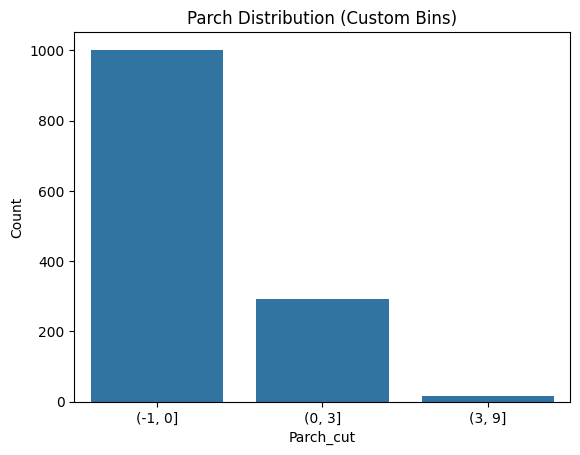

In [22]:
# 將 Parch 欄位分組，並將結果儲存在新的欄位 Parch_cut
total_data['Parch_cut'] = pd.cut(total_data['Parch'], bins=[-1, 0, 3, 9])

# 使用 countplot 查看分組後的 Parch_cut 欄位的分佈
sns.countplot(data=total_data, x='Parch_cut')
plt.title("Parch Distribution (Custom Bins)")
plt.xlabel("Parch_cut")
plt.ylabel("Count")
plt.show()

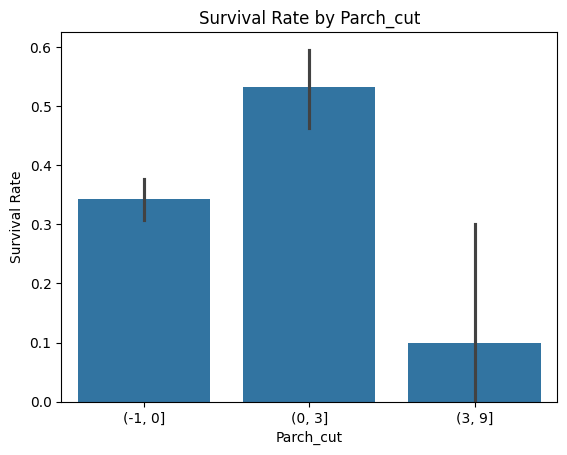

In [23]:
# 使用 barplot 查看不同 Parch_cut 值的生存率
sns.barplot(x='Parch_cut', y='Survived', data=total_data)
plt.title("Survival Rate by Parch_cut")
plt.xlabel("Parch_cut")
plt.ylabel("Survival Rate")
plt.show()

In [24]:
total_data.loc[ (total_data['Parch']>0) & (total_data['Parch']<=3) ,'Parch' ]=2
total_data.loc[ total_data['Parch']>4 ,'Parch' ]=4
total_data.loc[ total_data['Parch']<1,'Parch' ]=1
total_data['Parch'].value_counts()

,count
Parch,
1,1002
2,291
4,16


In [25]:
print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   int64   
 5   Age          1309 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1308 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1307 non-null   object  
 12  Parch_cut    1309 non-null   category
dtypes: category(1), float64(3), int64(5), object(4)
memory usage: 124.3+ KB
None


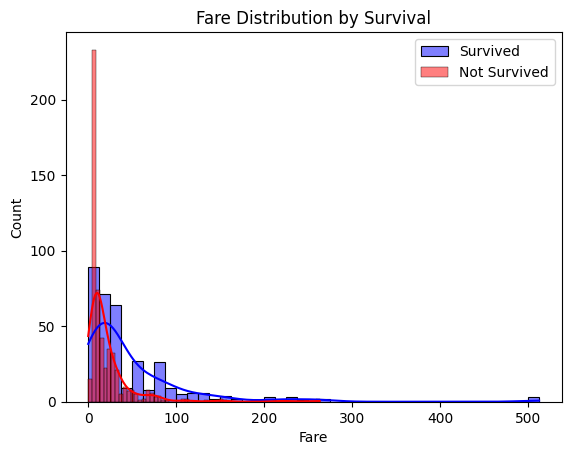

In [26]:
# 使用 histplot 查看 Fare 欄位分佈，依據生還與否使用不同顏色
sns.histplot(train_data[train_data['Survived'] == 1]['Fare'], color="blue", label="Survived", kde=True)
sns.histplot(train_data[train_data['Survived'] == 0]['Fare'], color="red", label="Not Survived", kde=True)

plt.title("Fare Distribution by Survival")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.legend()
plt.show()

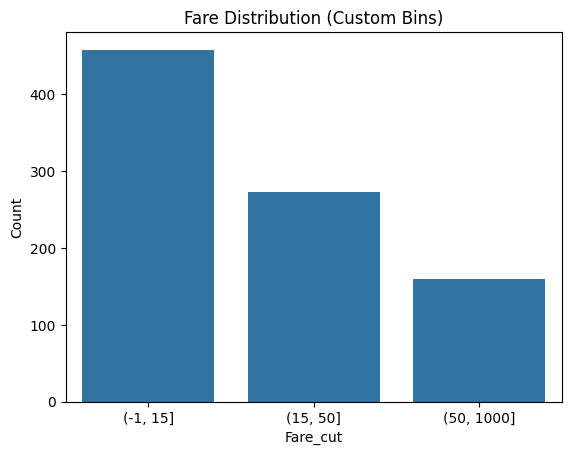

In [27]:
# 將 Fare 欄位分組，並將結果儲存在新的欄位 Fare_cut
train_data['Fare_cut'] = pd.cut(train_data['Fare'], bins=[-1, 15, 50, 1000])

# 使用 countplot 查看分組後的 Fare_cut 欄位的分佈
sns.countplot(data=train_data, x='Fare_cut')
plt.title("Fare Distribution (Custom Bins)")
plt.xlabel("Fare_cut")
plt.ylabel("Count")
plt.show()

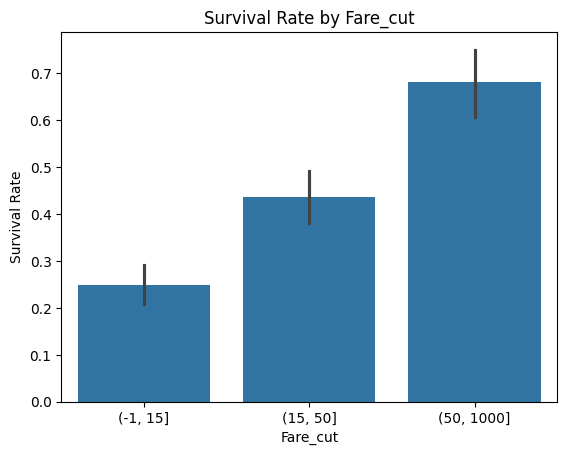

In [28]:
# 使用 barplot 查看不同 Fare_cut 值的生存率
sns.barplot(x='Fare_cut', y='Survived', data=train_data)
plt.title("Survival Rate by Fare_cut")
plt.xlabel("Fare_cut")
plt.ylabel("Survival Rate")
plt.show()

In [29]:
# (-1, 15] 區間設為 1
total_data.loc[total_data['Fare'] <= 15, 'Fare'] = 1

# (15, 50] 區間設為 2
total_data.loc[(total_data['Fare'] > 15) & (total_data['Fare'] <= 50), 'Fare'] = 2

# 其餘區間設為 3
total_data.loc[total_data['Fare'] > 2, 'Fare'] = 3

# 查看轉換後的 Fare 欄位的唯一值
print("Unique values in 'Fare' column after transformation:", total_data['Fare'].unique())
print(total_data['Fare'].value_counts())


Unique values in 'Fare' column after transformation: [ 1.  3.  2. nan]
Fare
1.0    673
2.0    395
3.0    240
Name: count, dtype: int64


In [30]:
# 使用 fillna 方法將 Fare 欄位中的缺失值填補為 1
total_data['Fare'] = total_data['Fare'].fillna(1)

# 檢查填補後的 Fare 欄位的值計數
print(total_data['Fare'].value_counts())


Fare
1.0    674
2.0    395
3.0    240
Name: count, dtype: int64


In [31]:
print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   int64   
 5   Age          1309 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1309 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1307 non-null   object  
 12  Parch_cut    1309 non-null   category
dtypes: category(1), float64(3), int64(5), object(4)
memory usage: 124.3+ KB
None


In [32]:
total_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

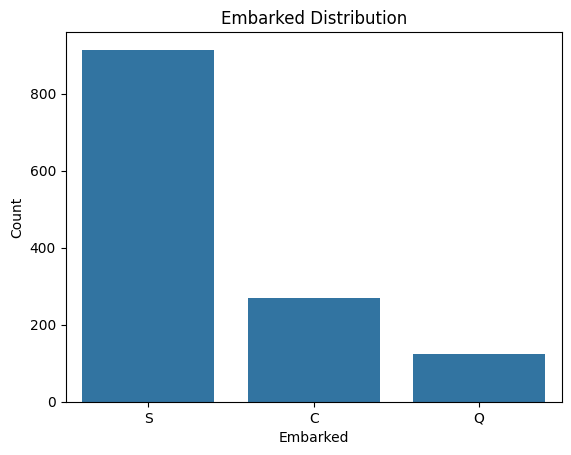

In [33]:
# 使用 countplot 查看 Embarked 欄位的分佈
sns.countplot(data=total_data, x='Embarked')
plt.title("Embarked Distribution")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.show()

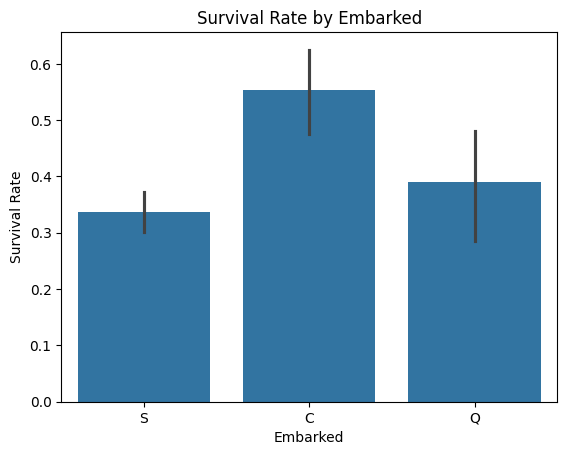

In [34]:
# 使用 barplot 查看不同 Embarked 值的生存率
sns.barplot(x='Embarked', y='Survived', data=train_data)
plt.title("Survival Rate by Embarked")
plt.xlabel("Embarked")
plt.ylabel("Survival Rate")
plt.show()

In [35]:
# 將 Embarked 欄位中的缺失值填補為 'S'
total_data['Embarked'] = total_data['Embarked'].fillna('S')

# 檢查填補後的 Embarked 欄位的唯一值
print("Unique values in 'Embarked' column after filling missing values:", total_data['Embarked'].unique())


Unique values in 'Embarked' column after filling missing values: ['S' 'C' 'Q']


In [36]:


# 初始化 LabelEncoder
labelencoder = LabelEncoder()

# 將 Embarked 欄位轉換為數值
total_data['Embarked'] = labelencoder.fit_transform(total_data['Embarked'])

# 顯示轉換後的 Embarked 欄位的唯一值及其數量
print("Encoded values in 'Embarked' column:")
print(total_data['Embarked'].value_counts())


Encoded values in 'Embarked' column:
Embarked
2    916
0    270
1    123
Name: count, dtype: int64


In [37]:
print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   int64   
 5   Age          1309 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1309 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1309 non-null   int64   
 12  Parch_cut    1309 non-null   category
dtypes: category(1), float64(3), int64(6), object(3)
memory usage: 124.3+ KB
None


In [38]:
# 將 DataFrame 中選擇的欄位轉換為 ndarray 格式
train_x = total_data[total_data['Survived'].notnull()][['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']].values
train_y = total_data[total_data['Survived'].notnull()]['Survived'].values
train_y = train_y.reshape(-1, 1)
test_x = total_data[total_data['Survived'].isnull()][['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']].values


In [39]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

(891, 6)
(891, 1)
(418, 6)


In [40]:
from sklearn.preprocessing import MinMaxScaler

# 初始化 MinMaxScaler
minmax = MinMaxScaler()

# 對訓練集和測試集進行正規化
train_x = minmax.fit_transform(train_x)
test_x = minmax.transform(test_x)


In [41]:
import torch

# 將訓練和測試資料轉換為 tensor
train_x = torch.tensor(train_x, dtype=torch.float32)
train_y = torch.tensor(train_y, dtype=torch.float32)
test_x = torch.tensor(test_x, dtype=torch.float32)


In [42]:
# 將資料拆分為 8:2 的訓練與驗證集
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.2)

# 檢查拆分後的資料形狀
print(train_x.shape)
print(valid_x.shape)
print(train_y.shape)
print(valid_y.shape)

torch.Size([712, 6])
torch.Size([179, 6])
torch.Size([712, 1])
torch.Size([179, 1])


In [43]:
from torch.utils.data import Dataset,DataLoader
class dataset(Dataset):
  def __init__(self,x,y):
    self.x=x
    self.y=y
    self.n_sample=len(x)
  def __getitem__(self,index):
    return self.x[index],self.y[index]
  def __len__(self):
    return self.n_sample


In [44]:
train_set=dataset(train_x,train_y)

In [45]:
from torch.utils.data import DataLoader

# 建立 DataLoader，設置 batch_size 和 shuffle
train_loader = DataLoader(dataset=train_set, batch_size=100, shuffle=True)




In [46]:
class Model(nn.Module):
  def __init__(self):
    super(Model,self).__init__()
    self.net=nn.Sequential(
        nn.Linear(train_x.shape[1],100),
        nn.ReLU(),
        nn.Linear(100,100),
        nn.ReLU(),
        nn.Linear(100,100),
        nn.ReLU(),
        nn.Linear(100,100),
        nn.ReLU(),
        nn.Linear(100,100),
        nn.ReLU(),
        nn.Linear(100,100),
        nn.ReLU(),
        nn.Linear(100,100),
        nn.ReLU(),
        nn.Linear(100,100),
        nn.ReLU(),
        nn.Linear(100,100),
        nn.ReLU(),
        nn.Linear(100,100),
        nn.ReLU(),
        nn.Linear(100,100),
        nn.ReLU(),
        nn.Linear(100,1)

    )
  def forward(self,x):
    return self.net(x)
model=Model()
critirion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.00001)

epoch=2000
n_batch=len(train_loader)
best_acc=0
for i in range(epoch):
  for j,(samples,labels) in enumerate(train_loader):
    pre=model(samples)
    loss=critirion(pre,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f'epoch={i+1}/{epoch},batch={j+1}/{n_batch},loss={loss:.4f}  ',end='')
    with torch.no_grad():
      n_sample=train_x.shape[0]
      pre=model(train_x)
      pre=pre.round()
      n_correct=(pre==train_y).sum()
      train_acc=n_correct/n_sample
      print(f'train_acc={train_acc:.4f}  ',end='')
    with torch.no_grad():
      n_sample=valid_x.shape[0]
      pre=model(valid_x)
      pre=pre.round()
      n_correct=(pre==valid_y).sum()
      valid_acc=n_correct/n_sample
      print(f'valid_acc={valid_acc:.4f}'  )
      if(best_acc<valid_acc and (abs(valid_acc-train_acc))<0.01 and (valid_acc<train_acc) and(train_acc<0.825)):
        best_acc=valid_acc #更新最好正確率
        torch.save(model,"model.pth") #儲存model
        print("update") #輸出update字樣

串流輸出內容已截斷至最後 5000 行。
epoch=1376/2000,batch=1/8,loss=0.1311  train_acc=0.8343  valid_acc=0.7989
epoch=1376/2000,batch=2/8,loss=0.1080  train_acc=0.8343  valid_acc=0.7989
epoch=1376/2000,batch=3/8,loss=0.0922  train_acc=0.8343  valid_acc=0.7989
epoch=1376/2000,batch=4/8,loss=0.1516  train_acc=0.8343  valid_acc=0.7989
epoch=1376/2000,batch=5/8,loss=0.1150  train_acc=0.8343  valid_acc=0.7989
epoch=1376/2000,batch=6/8,loss=0.1300  train_acc=0.8343  valid_acc=0.7989
epoch=1376/2000,batch=7/8,loss=0.1367  train_acc=0.8343  valid_acc=0.7989
epoch=1376/2000,batch=8/8,loss=0.1026  train_acc=0.8343  valid_acc=0.7989
epoch=1377/2000,batch=1/8,loss=0.1151  train_acc=0.8343  valid_acc=0.7989
epoch=1377/2000,batch=2/8,loss=0.0793  train_acc=0.8343  valid_acc=0.7989
epoch=1377/2000,batch=3/8,loss=0.1682  train_acc=0.8343  valid_acc=0.7989
epoch=1377/2000,batch=4/8,loss=0.1338  train_acc=0.8343  valid_acc=0.7989
epoch=1377/2000,batch=5/8,loss=0.0964  train_acc=0.8343  valid_acc=0.7989
epoch=1377/2000,b

In [47]:
best_model_pre_cabin=torch.load("/content/model.pth")

<ipython-input-47-7d0a25e51871>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model_pre_cabin=torch.load("/content/model.pth")


Confusion Matrix:
 [[100   5]
 [ 33  41]]


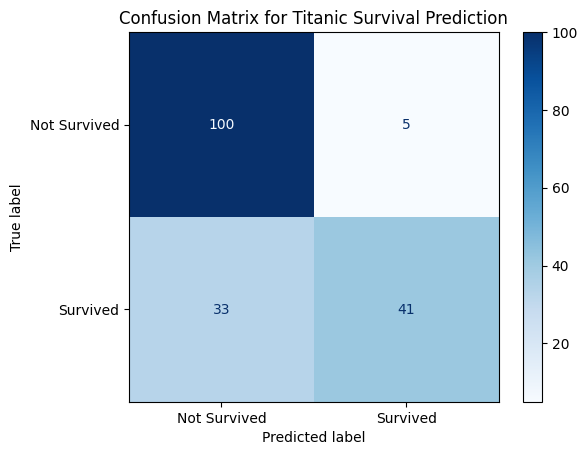

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch

# 切換模型為評估模式
model.eval()

# 獲取預測結果
with torch.no_grad():
    y_pred = model(valid_x)
    y_pred = torch.round(y_pred).view(-1).detach().numpy().astype(int)  # 將預測結果轉為 numpy 格式並四捨五入

# 確認 valid_y 沒有 NaN 值並轉為 numpy 格式
valid_y = valid_y.detach().numpy().astype(int)  # 確保 valid_y 是整數型

# 計算混淆矩陣
cm = confusion_matrix(valid_y, y_pred)
print("Confusion Matrix:\n", cm)

# 視覺化混淆矩陣
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Survived", "Survived"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Titanic Survival Prediction")
plt.show()


In [49]:
with torch.no_grad():
      n_sample=valid_x.shape[0]
      pre=best_model_pre_cabin(valid_x)
      pre=pre.round()
      n_correct=(pre==valid_y).sum()
      acc=n_correct/n_sample
      print(f'valid_acc={acc:.4f}'  )


valid_acc=0.7542


In [50]:
with torch.no_grad():
      n_sample=train_x.shape[0]
      pre=best_model_pre_cabin(train_x)
      pre=pre.round()
      n_correct=(pre==train_y).sum()
      acc=n_correct/n_sample
      print(f'train_acc={acc:.4f}'  )

train_acc=0.7584


In [51]:
answer.to_csv('HW2.csv',index=False)

NameError: name 'answer' is not defined